# Tutorial 2

# Imported modules

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from scipy import optimize
import sys

In [2]:
def output_banner():
    print(' Iter   Nfev     Step       Objective    Norm of g')


In [3]:
def output_iteration_info(k, nf, t, f, g):
    print('{0:5d} {1:6d} {2:10e} {3:10e} {4:10e}'.format(k, nf, t, f, LA.norm(g, np.inf)))

In [4]:
def output_final_results(x, f, g, nf, ng, nh, k):   
    print('\n')
    print('          x:', x)
    print('        fun:', f)
    print('        jac:', g)
    print('norm of jac:', LA.norm(g, np.inf))
    print('       nfev:', nf)
    print('       ngev:', ng)
    print('       nhev:', nh)
    print('        nit:', k)


# Example 1: The Rosenbrock function

## Objective function

In [5]:
def objective(x):
    """Rosen function"""
    return 100*(x[1]-x[0]**2)**2 + (1-x[0])**2

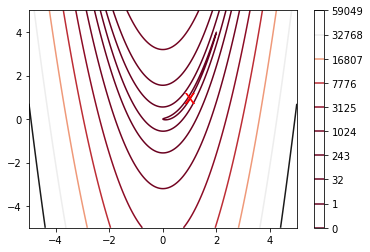

In [6]:
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)
X, Y = np.meshgrid(x, y)
Z = objective(np.vstack([X.ravel(), Y.ravel()])).reshape((1000,1000))
plt.contour(X, Y, Z, np.arange(10)**5, cmap='RdGy')
plt.colorbar();
plt.text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20);

### The gradient

In [7]:
def gradient(x):
    """Derivative of Rosenbrock's function."""
    return np.array([    
        400 * (x[0]**2 - x[1]) * x[0] + 2*(x[0]-1),
        200 * (x[1] - x[0]**2)
    ])

### The Hessian

In [8]:
def hessian(x):
    """Hessian of Rosenbrock's function."""
    return np.array([
        [2 - 400 * (x[1] - 3 * x[0]**2), -400 * x[0]],
        [                   -400 * x[0],         200]
    ])

# A first approach (See Tutorial 1)

In [9]:
def steepest_descent_AllInOne(objective, gradient, x0):
    """Implements simple gradient descent for the Rosen function."""

    maxiter = 20000

    dxmax = 1

    c1 = .0001
    beta = .5
    x = x0
    f = objective(x); nf = 1
    g = gradient(x); ng = 1
    
    k = 0
    
    #
    output_banner()
    while ((LA.norm(g, np.inf) > 1e-6) and (k < maxiter)):
        d = -g
        t = min(1, dxmax/LA.norm(g, np.inf))
        xnew = x + t * d
        fnew = objective(xnew)
        nf = nf + 1
        j = 1
        while ((fnew > f + t * c1 * np.inner(g,d)) and (j <= 15)):
            t = t * beta
            xnew = x + t * d
            fnew = objective(xnew); nf += 1
            j  += 1
        if j > 15:
            print('Armijo failed to make progress')
            return
        if (k%100 == 1):
            print('{0:5d} {1:6d} {2:10e} {3:10e} {3:10e}'.format(k, nf, t, f, LA.norm(g, np.inf)))
        x = xnew
        f = fnew
        g = gradient(x); ng += 1
        k += 1

    output_final_results(x, f, g, nf, ng, 0, k);
    return x, f, g


In [10]:
steepest_descent_AllInOne(objective,gradient,[-1.2, -1.2]);

 Iter   Nfev     Step       Objective    Norm of g
    1      3 6.062259e-03 6.946539e+01 6.946539e+01
  101    775 3.906250e-03 1.400959e-01 1.400959e-01
  201   1670 1.953125e-03 7.450635e-02 7.450635e-02
  301   2588 1.953125e-03 4.589033e-02 4.589033e-02
  401   3525 3.906250e-03 3.153485e-02 3.153485e-02
  501   4473 3.906250e-03 2.303766e-02 2.303766e-02
  601   5429 1.953125e-03 1.730758e-02 1.730758e-02
  701   6389 1.953125e-03 1.327255e-02 1.327255e-02
  801   7354 1.953125e-03 1.029422e-02 1.029422e-02
  901   8322 1.953125e-03 8.107398e-03 8.107398e-03
 1001   9294 1.953125e-03 6.423842e-03 6.423842e-03
 1101  10268 1.953125e-03 5.142516e-03 5.142516e-03
 1201  11244 1.953125e-03 4.148125e-03 4.148125e-03
 1301  12222 3.906250e-03 3.360764e-03 3.360764e-03
 1401  13202 3.906250e-03 2.738614e-03 2.738614e-03
 1501  14184 1.953125e-03 2.243543e-03 2.243543e-03
 1601  15167 1.953125e-03 1.843278e-03 1.843278e-03
 1701  16151 3.906250e-03 1.518507e-03 1.518507e-03
 1801  17137 

# Algorithms

## Linesearches

### Armijo

In [11]:
def armijo(obj, grad, x0, f0, g0, t0, d, nf, ng):
    
    """
    
    """

    c1 = 1e-4 
    
    iterMax = 20
    
    gtd0 = np.inner(g0,d)
    
    if (gtd0 >= 0):
        print('ARMIJO: Direction provided is not a descent direction.')
        sys.exec(1)
    
    t = t0

    for k in range(iterMax):
        x = x0 + t*d
        f = obj(x)
        if (f < f0 + c1*t*gtd0):
            g = grad(x)
            return x, f, g, t, nf + k + 1, ng + 1
        else:
            t = t/2
    
    print("ARMIJO: Maximum Iterations exceeded.")
    sys.exec(1)

### Wolfe

In [12]:
def wolfe(obj, grad, x0, f0, g0, t0, d, nf, ng):
    
    """
    """
    
    c1 = 1e-4;
    c2 = 0.90;
    
    iterMax = 20
    
    a  = 0
    b  = np.inf
    gtd0 = g0.T @ d

    if (gtd0 >= 0):
        print('WOLFE: Direction not a descent direction.')

    t  = t0;

    for k in range(iterMax):
        x = x0 + t*d
        f = obj(x); nf += 1
        if (f > f0 + c1*t*gtd0):
            b = t
            t = (a+b)/2
        elif (np.inner((g := grad(x)), d) < c2*gtd0):
            print(np.inner((g := grad(x)),d) < c2*gtd0)
            ng = ng + 1
            a = t
            if (b == np.inf):
                t = 2*t
            else:
                t = (a+b)/2
        else:
            return x, f, grad(x), t, nf, ng+1

    print("WOLFE: Maximum Iterations exceeded.")
    sys.exec(1)

# Descent directions

## Steepest descent

In [13]:
def steepest_descent(objective, gradient, linesearch, x0):
    
    """Implements simple gradient descent for the Rosen function."""

    maxiter = 20000

    #
   
    x = x0
    f = objective(x); nf = 1
    g = gradient(x); ng = 1
    
    dxmax = 1
    
    k = 0
    
    output_banner()
    while ((LA.norm(g, np.inf) > 1e-6) and (k < maxiter)):
        t = min(1, dxmax/LA.norm(g, np.inf))
        d = -g
        x, f, g, t, nf, ng = armijo(objective, gradient, x, f, g, 1, d, nf, ng)
        k += 1
        if (k%100 == 1): output_iteration_info(k, nf, t, f, g)

    output_final_results(x, f, g, nf, ng, 0, k);
    return x, f, g, nf, ng, k;

In [14]:
steepest_descent(objective,gradient, wolfe, [-1.2, 1]);

 Iter   Nfev     Step       Objective    Norm of g
    1     12 9.765625e-04 5.101113e+00 3.833803e+01
  101    993 1.953125e-03 4.317874e-03 8.291101e-02
  201   1971 1.953125e-03 3.497256e-03 7.304834e-02
  301   2950 3.906250e-03 2.850094e-03 1.286338e-01
  401   3932 1.953125e-03 2.328546e-03 6.486286e-02
  501   4914 3.906250e-03 1.914609e-03 1.139310e-01
  601   5898 3.906250e-03 1.577284e-03 1.016314e-01
  701   6883 3.906250e-03 1.304237e-03 1.010128e-01
  801   7870 1.953125e-03 1.078798e-03 4.098105e-02
  901   8857 1.953125e-03 8.961156e-04 3.669627e-02
 1001   9844 1.953125e-03 7.466060e-04 6.535982e-02
 1101  10833 1.953125e-03 6.221063e-04 3.823307e-02
 1201  11822 1.953125e-03 5.197993e-04 3.987597e-02
 1301  12812 1.953125e-03 4.349059e-04 2.950856e-02
 1401  13802 1.953125e-03 3.644727e-04 3.431733e-02
 1501  14793 1.953125e-03 3.057491e-04 2.589192e-02
 1601  15784 1.953125e-03 2.568466e-04 2.846139e-02
 1701  16776 1.953125e-03 2.159454e-04 1.905203e-02
 1801  17768 

## Newton's method

In [15]:
def newton(objective, gradient, hessian, x0):
    """Implements simple gradient descent for the Rosen function."""

    maxiter = 100
    sigma = 1e-4
    beta = .5

    x = x0
    f = objective(x); nf = 1
    g = gradient(x); ng = 1
    h = hessian(x); nh = 1
    
    k = 0
    
    output_banner()
    
    while ((LA.norm(g, np.inf) > 1e-10) and (k <= maxiter)):
        d = - LA.solve(h,g)
        t = 1
        xnew = x + t * d
        fnew = objective(xnew); nf += 1
        j = 1
        while ((fnew > f + t * sigma * np.inner(g,d)) and (j <= 15)):
            t = t * beta
            xnew = x + t * d
            fnew = objective(xnew); nf += 1
            j += 1
        if j > 15:
            print('Armijo failed to make progress')
            return
        x = xnew
        f = fnew
        g = gradient(x); ng += 1 
        h = hessian(x); nh +=1
        k += 1
        output_iteration_info(k, nf, t, f, g)


    output_final_results(x, f, g, nf, ng, nh, k)
    return x, f, g, nf, ng, nh, k


In [16]:
newton(objective,gradient,hessian,[-1.2, 1]);

 Iter   Nfev     Step       Objective    Norm of g
    1      2 1.000000e+00 4.731884e+00 4.637816e+00
    2      6 1.250000e-01 4.087399e+00 2.597527e+01
    3      7 1.000000e+00 3.228673e+00 1.064945e+01
    4      8 1.000000e+00 3.213898e+00 2.206212e+01
    5      9 1.000000e+00 1.942585e+00 3.490822e+00
    6     12 2.500000e-01 1.600194e+00 7.416644e+00
    7     13 1.000000e+00 1.178390e+00 4.129529e+00
    8     14 1.000000e+00 9.224116e-01 8.632974e+00
    9     15 1.000000e+00 5.974886e-01 1.586502e+00
   10     17 5.000000e-01 4.526251e-01 5.211761e+00
   11     18 1.000000e+00 2.807624e-01 1.994087e+00
   12     19 1.000000e+00 2.113934e-01 7.202631e+00
   13     20 1.000000e+00 8.901950e-02 4.844785e-01
   14     22 5.000000e-01 5.153540e-02 3.216052e+00
   15     23 1.000000e+00 1.999278e-02 9.998121e-01
   16     24 1.000000e+00 7.169244e-03 2.211489e+00
   17     25 1.000000e+00 1.069614e-03 1.959825e-01
   18     26 1.000000e+00 7.776846e-05 3.097269e-01
   19     27 

In [17]:
optimize.minimize(objective, [-1.2, 1], method="Newton-CG", jac=gradient, hess=hessian)    

     fun: 3.0314383583873516e-10
     jac: array([ 0.00510413, -0.0025644 ])
 message: 'Optimization terminated successfully.'
    nfev: 105
    nhev: 83
     nit: 83
    njev: 105
  status: 0
 success: True
       x: array([0.9999826 , 0.99996514])

## BFGS

In [18]:
def BFGSWolfe(objective, gradient, x0):

    maxIter = 500;

    eps = 1e-6;
    
    x = x0;   

    f = objective(x); nf = 1
    g = gradient(x); ng = 1

    I = np.eye(len(x))
    H = I

    output_banner()
    
    k = 1

    while ((LA.norm(g, np.inf) > eps) and (k < maxIter)):
        d = - np.dot(H, g)
        xnew, fnew, gnew, t, nf, ng = wolfe(objective,gradient,x,f,g,1,d,nf,ng);
        s  = xnew - x
        y  = gnew - g
        r  = 1/np.dot(y,s)
        H  = np.dot((I - r * np.outer(s,y)), np.dot(H, (I - r * np.outer(y,s)))) + r * np.outer(s,s)
        x  = xnew
        f  = fnew
        g  = gnew
        k += 1
        output_iteration_info(k, nf, t, f, g)
    
    output_final_results(x, f, g, nf, ng, 0, k)
    return x, f, g, nf, ng, 0, k

In [19]:
BFGSWolfe(objective,gradient,[50, 50]);

 Iter   Nfev     Step       Objective    Norm of g
    2     21 1.907349e-06 3.377751e+08 3.194965e+07
    3     29 7.812500e-03 3.373342e+08 2.810656e+07
    4     30 1.000000e+00 3.121695e+04 2.690491e+05
    5     31 1.000000e+00 1.609260e+03 5.393994e+02
    6     32 1.000000e+00 1.609166e+03 7.534541e+01
True
True
    7     35 4.000000e+00 1.609143e+03 1.320121e+01
    8     36 1.000000e+00 1.608871e+03 4.198076e+02
    9     37 1.000000e+00 1.608304e+03 9.678092e+02
   10     38 1.000000e+00 1.606611e+03 1.950617e+03
   11     39 1.000000e+00 1.601402e+03 3.524036e+03
True
   12     42 1.500000e+00 1.522099e+03 5.980294e+03
   13     45 2.500000e-01 1.520621e+03 2.711752e+03
   14     46 1.000000e+00 1.517375e+03 3.597237e+03
   15     47 1.000000e+00 1.510343e+03 6.250842e+03
   16     48 1.000000e+00 1.502625e+03 5.465969e+03
   17     49 1.000000e+00 1.460502e+03 4.785616e+03
   18     50 1.000000e+00 1.431137e+03 1.864906e+03
   19     53 2.500000e-01 1.400976e+03 2.769211e+0

In [20]:
optimize.minimize(objective, [50, 50], method="BFGS", jac=gradient)    

      fun: 6.644384936652461e-15
 hess_inv: array([[0.4998302 , 0.99989026],
       [0.99989026, 2.00497017]])
      jac: array([ 3.26279429e-06, -1.62462368e-06])
  message: 'Optimization terminated successfully.'
     nfev: 319
      nit: 247
     njev: 319
   status: 0
  success: True
        x: array([1.00000001, 1.00000001])

## Conjugate gradient

In [21]:
optimize.minimize(objective, [12, 12], method="CG", jac=gradient)    

     fun: 2.0249069434785674e-12
     jac: array([5.63656442e-07, 1.14002030e-06])
 message: 'Optimization terminated successfully.'
    nfev: 99
     nit: 40
    njev: 95
  status: 0
 success: True
       x: array([1.00000142, 1.00000285])

# A second example

## Objective function

In [22]:
def f(x):
    return x[0]**4/4 - x[0]**2 + 2*x[0] + (x[1]-1)**2

## Gradient

In [23]:
def gradient(x):
    return np.array([x[0]**3 - 2*x[0] + 2, 2*(x[1]-1)])

## Hessian

In [24]:
def hessian(x):
    return np.array([[3*x[0]**2-2,  0], [0, 2]])

# To go further

1. Test the developed functions on the generalized Rosenbrock function
2. Code the conjugate-gradient algorithm
2. Code a modified Newton direction algorithm to deal with the case in which the pure Newton direction is not a descent direction
3. Code the stochastic gradient descent
4. Experiment with other test functions (see provided file)